In [1]:
# Install PyMuPDF if not already installed
!pip install pymupdf
!pip install pytesseract pdf2image pillow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [pytesseract]
   ---------------------------------------- 0/2 [pytesseract]
   ---------------------------------------- 0/2 [pytesseract]
   ---------------------------------------- 0/2 [pytesseract]
   ---------------------------------------- 0/2 [pytesseract]
   ---------------------------------------- 0/2 [pytesseract]
   -------------------- ------------------- 1/2 [pdf2image]
   -------------------- ------------------- 1/2 [pdf2image]
   -------------------- ------------------- 1/2 [pdf2image]
   -------------------- ------------------- 1/2 [pdf2image]
   -------------------- ------------------- 1/2 [pdf2image]
   -------------------- ------------------- 1/2 [pdf2image]
   ---------------------------------------- 2/2 [pdf2image]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Step 1: Load and Preprocess the the Text Data
import pytesseract
from pdf2image import convert_from_path
import os
import re
from collections import Counter
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
# Install poppler-utils
!apt-get install poppler-utils

# Set the path to the Tesseract executable (replace with your actual path)
pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Convert PDF to images
images = convert_from_path('sample.pdf')

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [7]:

# Set the path to Tesseract executable (if not in PATH)
pytesseract.pytesseract.tesseract_cmd = r'C:/Users/User/Documents/KSB Files/Books/Àsà àti ìse Yorùbá C. L. Adéoyé.pdf'

# Path to your PDF
pdf_path = "Àsà àti ìse Yorùbá C. L. Adéoyé.pdf"

# Convert PDF to list of images
images = convert_from_path(pdf_path, dpi=300)

# Specify Tesseract config for Yoruba
custom_config = r'--oem 3 --psm 6 -l yor'

# Extract text from each image
full_text = ""
for i, image in enumerate(images):
    text = pytesseract.image_to_string(image, config=custom_config)
    full_text += f"--- Page {i+1} ---\n{text}\n"

# Save extracted text to a file
output_file = "extracted_yoruba_text.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.write(full_text)

print(f"Extracted text saved to {output_file}")

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [ ]:
import fitz  # PyMuPDF

# Define the file path for the uploaded PDF
pdf_path = "C:/Users/User/Documents/KSB Files/Books/Àsà àti ìse Yorùbá C. L. Adéoyé.pdf"  # Adjust filename as necessary

# Extract text from the PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text") + "\n"
    return text

# Get the extracted text
large_text = extract_text_from_pdf(pdf_path)

# Write the text to a file named 'Àsà àti ìse Yorùbá C. L. Adéoyé.txt'
with open("C:/Users/User/Documents/KSB Files/Books/Àsà àti ìse Yorùbá C. L. Adéoyé.txt", "w") as file:
    file.write(large_text)

print("Extracted text saved to 'Àsà àti ìse Yorùbá C. L. Adéoyé.txt'")

Extracted text saved to 'Àsà àti ìse Yorùbá C. L. Adéoyé.txt'


In [8]:
#Load the text data
with open("C:/Users/User/Documents/KSB Files/Books/Àsà àti ìse Yorùbá C. L. Adéoyé.txt", "r") as file:
  text = file.read()

In [9]:
#Preprocess the text
text = text.lower()                             #convert to lowercase
text = re.sub(r'[^\w\s]', '', text)         #Remove punctuation
tokens = word_tokenize(text)                   #Tokenize the text

In [10]:
#Display a sample of tokens
print(tokens[:20])

['university', 'press', 'plc', '18adan', 'aba', 'ahuja', 'ajeuunle', 'akure', 'benin', 'ikeja', 'florin', 'jos', 'kino', 'makurd', 'onitsii', 'owerrj', 'war1i', 'zaria', 'university', 'press']


In [11]:
#Step 2: Calculate the word frequencies
word_counts = Counter(tokens)

#Display the 10 most common words
print("Most common words:", word_counts.most_common(10))

Most common words: [('ti', 5175), ('ni', 4587), ('a', 3388), ('si', 2222), ('i', 2210), ('6', 1917), ('wqn', 1494), ('bi', 1397), ('ba', 1387), ('ki', 1344)]


In [12]:
#Step 3: Calculate Basic Statistical Measures
import numpy as np

#convert word frequencies to a list of counts
word_frequencies = list(word_counts.values())

#Calculate mean, variance, and standard deviation
mean_freq = np.mean(word_frequencies)
variance_freq = np.var(word_frequencies)
std_dev_freq = np.std(word_frequencies)

print(f"Mean Frequency: {mean_freq}")
print(f"Variance Frequency: {variance_freq}")
print(f"Standard Deviation Frequency: {std_dev_freq}")

Mean Frequency: 6.5296564906954515
Variance Frequency: 5863.921240580265
Standard Deviation Frequency: 76.57624462312228


Text(0.5, 1.0, 'Histogram of Word Frequencies')

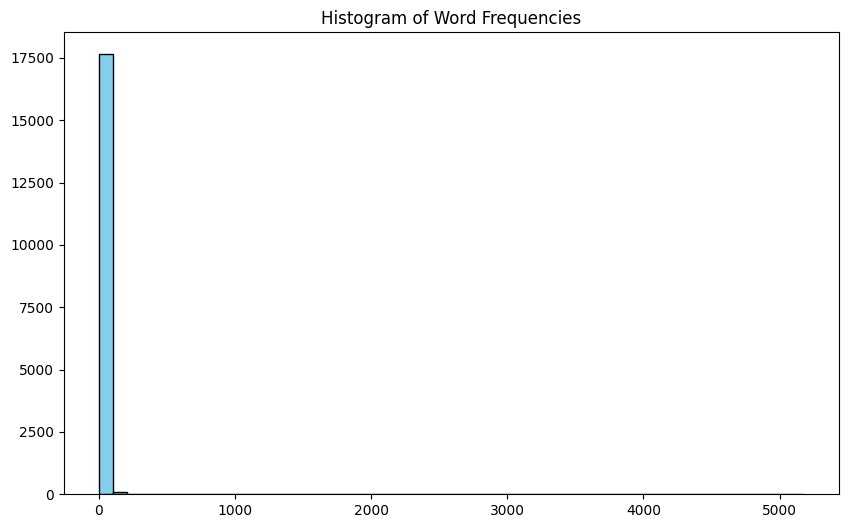

In [13]:
#Step 4: Visualize the word Frequency Distribution
import matplotlib.pyplot as plt
#Plot histogram of word frequencies
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Word Frequencies")

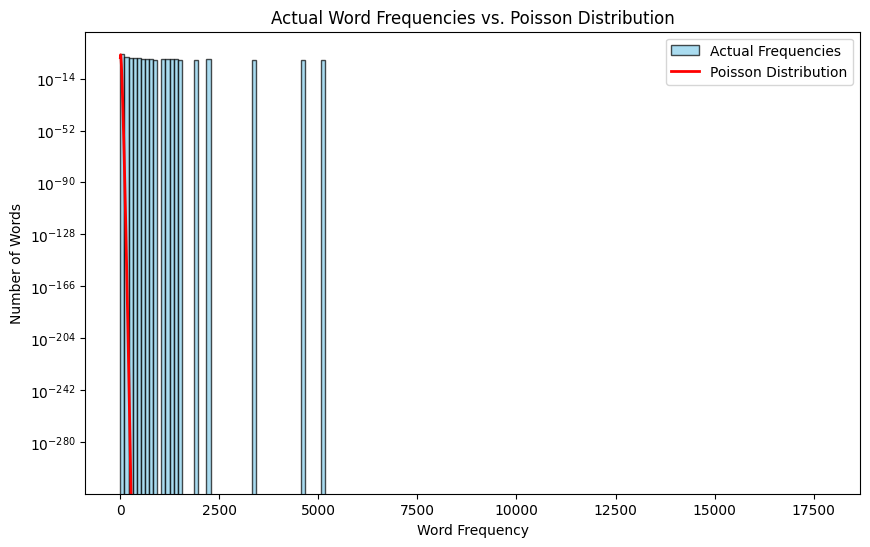

In [14]:
#Step 5: Compare with Probability Distributions-to see if the word frequency distribution follows any known probability distribution, we'll compare it with a Poisson distribution(often used foe word occurrences) and normal distribution.
#Poisson Distribution: Assume the average rate (lambda) of word occurrences and generate a Poisson distribution to match
from scipy.stats import poisson
#Define lambda as the mean word frequency
lambda_poisson = mean_freq
#generate Poisson distribution
poisson_dist = [poisson.pmf(k, lambda_poisson) *len(word_frequencies) for k in range(len(word_frequencies))]

#plot the actual vs. Poisson distribution
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Actual Frequencies')
plt.plot(poisson_dist, 'r-', label="Poisson Distribution", linewidth=2)
plt.yscale("log")
plt.title("Actual Word Frequencies vs. Poisson Distribution")
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.legend()
plt.show()

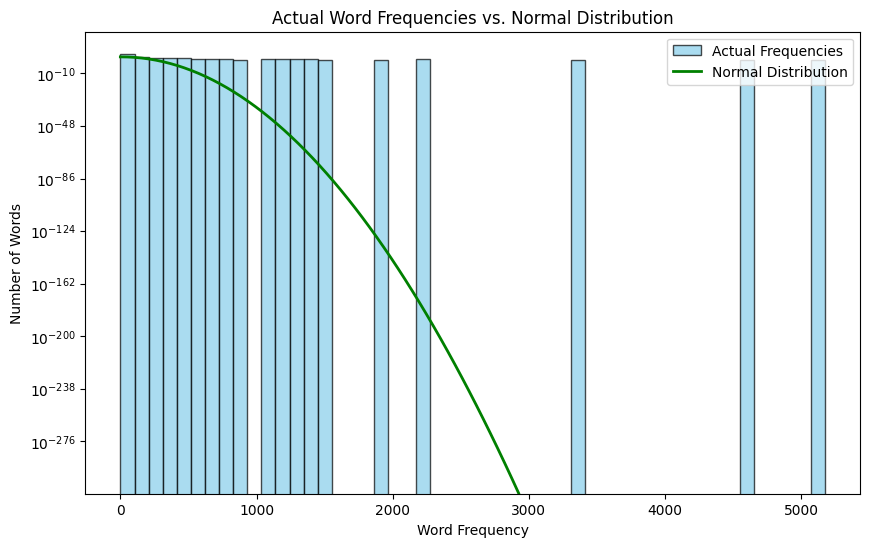

In [15]:
#Normal Distribution: To compare with a normal disribution, use the mean and standard deviation of word frequencies.
from scipy.stats import norm

#Generate x values and normal distribution with the calculated mean and std deviation
x = np.linspace(0, max(word_frequencies), 100)
normal_dist = norm.pdf(x, mean_freq, std_dev_freq) * len(word_frequencies)

#Plot the actual vs. normal distribution
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Actual Frequencies')
plt.plot(x, normal_dist, 'g-', label="Normal Distribution", linewidth=2)
plt.yscale("log")
plt.title("Actual Word Frequencies vs. Normal Distribution")
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.legend()
plt.show()

In [16]:
#FOR AUTHORSHIP ATTRIBUTION
#Assume tokens_chapter1 and tokens_chapter2 are two subsets of word tokens from different chapters.
#Calculate word frequencies for both chapters
word_counts_chapter1 = Counter(tokens_chapter1)
word_counts_chapter2 = Counter(tokens_chapter2)

NameError: name 'tokens_chapter1' is not defined

In [ ]:
#Extract frequencies of common word, e.g., "Bilbo"
freq_chapter1 = word_counts_chapter1["Bilbo"]
freq_chapter2 = word_counts_chapter2["Bilbo"]

In [ ]:
#Perform a t-test to compare word frequencies between chapters
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind([freq_chapter1], [freq_chapter2])

In [ ]:
#Create sample frequency lists
freqs_ch1 = [word_counts_chapter1[word] for word in word_counts_chapter1]
freqs_ch2 = [word_counts_chapter2[word] for word in word_counts_chapter2]

#conduct t-test
t_stat, p_value = ttest_ind(freqs_ch1, freqs_ch2)
print(f't-statistic: {t_stat}, p-value: {p_value}')

if p_value < 0.05:
  print("Significant difference in word frequencies between chapters")
else:
  print("No significant difference in word frequencies between chapters.")